# Notes on Cohen's Kappa

On a 2-class classification task with:
- $N$ input data
- two raters $R_1$, $R_2$
- two classes 1, 2
- each rater clasifies each input data as one of the classes

We can aggregate the rating results into a confusion matrix, where each row represents the number of cases rater $R_1$ assigns to each class and each column represents the number of cases rater $R_2$ assigns to each class:

 |1|2
---|---|---
1|$a_{11}$|$a_{12}$
2|$a_{21}$|$a_{22}$

where $ N=\sum_{i=1}^2\sum_{j=1}^2 a_{ij} $

And the Cohen's Kappa is defined as:

$$ \frac{P_o-P_e}{1-P_e} $$


Where $P_o$ is the proportion of cases where both raters agree: 

\begin{align}
    P_o &= P(R_1=0 \text{ and } R_2=0) + P(R_1=1 \text{ and } R_2=1) \\
    &= \frac{a_{11} + a_{22}}{N}
\end{align}

And this is the accuracy metric we are familiar with.

However, we want to penalize for the probability that the two raters rate randomly and agrees:

\begin{align}
    P_e &= P(R_1=0)P(R_2=0) + P(R_1=1)P(R_2=1) \\
    &= \frac{a_{1\cdot}}{N}\times\frac{a_{\cdot1}}{N} + \frac{a_{2\cdot}}{N}\times\frac{a_{\cdot2}}{N} \\
    &= \frac{1}{N^2}\sum_{k=1}^ 2a_{\cdot k}a_{k\cdot}
\end{align}

where

\begin{align}
    & a_{i\cdot} = \sum_{j=1}^2 a_{ij} \\
    & a_{\cdot j}= \sum_{i=1}^2 a_{ij}
\end{align}


# Does Cohen's Kappa have a maximum/minimum?

The interesting thing about Cohen's Kappa is that it has one more degree of freedom than the accuracy metric. As we can see from the confusion matrix, if we fix $a_{11}$ and $a_{22}$, then accuracy is fixed no matter how the mismatches are distributed across false positives (FPs) and false negatives (FNs). However, if we change $a_{12}$ ($a_{21}$ is determined when all of $a_{11}, a_{12}$ and $a_{22}$ are fixed since total number $N$ is fixed), cohen's kappa will change as a function of it. Let's see if there's a way to maximize/minimize this single variable function.

Firstly, let's assume that $N$, $a_{11}$ and $a_{22}$ are fixed, and let $x=a_{12}$. Then $a_{21} = N-a_{11}-a_{22}-x$:


 |`__________1__________`|`__________2__________`|`__________Total__________`
---|---|---|---
1|$a_{11}$|$x$|$N_{1\cdot}=a_{11}+x$
2|$N-a_{11}-a_{22}-x$|$a_{22}$|$N_{2\cdot}=N-a_{11}-x$
Total|$N_{\cdot1}=N-a_{22}-x$|$N_{\cdot2}=a_{22}+x$|$N$

Now we can write kappa as a function of $x$:

\begin{align}
    \kappa(x) & = \frac{P_o-P_e}{1-P_e}\\
    & = \frac{\frac{a_{11} + a_{22}}{N} - \frac{N_{1\cdot}N_{\cdot1} + N_{2\cdot}N_{\cdot2}}{N^2}}{1-\frac{N_{1\cdot}N_{\cdot1} + N_{2\cdot}N_{\cdot2}}{N^2}} \\
    & = \frac{N(a_{11} + a_{22}) - (N_{1\cdot}N_{\cdot1} + N_{2\cdot}N_{\cdot2})}{N^2 - (N_{1\cdot}N_{\cdot1} + N_{2\cdot}N_{\cdot2})} \\
\end{align}

Let's expand $N_{1\cdot}N_{\cdot1} + N_{2\cdot}N_{\cdot2}$:

\begin{align}
    N_{1\cdot}N_{\cdot1} + N_{2\cdot}N_{\cdot2} & = (a_{11}+x)(N-a_{22}-x) + (N-a_{11}-x)(a_{22}+x) \\
    & = Na_{11} - a_{11}a_{22} - a_{11}x + Nx - a_{22}x - x^2 + Na_{22} - a_{11}a_{22} - a_{22}x + Nx - a_{11}x - x^2 \\
    & = N(a_{11} + a_{22}) - 2a_{11}a_{22} + 2(N-a_{11}-a_{22})x - 2x^2
\end{align}

Now to simplify notations, we let:

\begin{align}
    f(x) & = 2(N-a_{11}-a_{22})x - 2x^2 \\
    C_1 & = N(a_{11} + a_{22}) \\
    C_2 & = N^2 \\
    C_3 & = N(a_{11} + a_{22}) - 2a_{11}a_{22}
\end{align}

Then we have

$$ N_{1\cdot}N_{\cdot1} + N_{2\cdot}N_{\cdot2} = C_3 + f(x) $$

and

$$ \kappa(x) = \frac{C_1 - C_3 - f(x)}{C_2 -C_3 - f(x)} $$

Since $\kappa(x)$ is a smooth function in $x$ for $0 \le x \le N-a_{11}-a_{22}$, we just need to calculate its first and second derivative with respect to $x$ to find its maximum.

\begin{align}
    \frac{d}{dx}\kappa(x) & = \frac{-\frac{d}{dx}f(x)\big(C_2 -C_3 - f(x)\big) - \Big(-\frac{d}{dx}f(x)\big(C_1 - C_3 - f(x)\big)\Big)}{(C_2 -C_3 - f(x))^2} \\
    & = \frac{\big(C_1 - C_2\big)\frac{d}{dx}f(x)}{(C_2 -C_3 - f(x))^2}
\end{align}

By setting $\frac{d}{dx}\kappa(x)=0$, we have 

\begin{align}
    & \big(C_1 - C_2\big)\frac{d}{dx}f(x) = 0 \\
    \implies & \frac{d}{dx}f(x) = 0 \\
    \implies & 2(N-a_{11}-a_{22}) - 4x = 0 \\
    \implies & x = \frac{1}{2}(N-a_{11}-a_{22})
\end{align}

To check that whether this is a minimum or maximum, let's check its 2nd derivative:

Note that $\frac{d^2}{dx^2}f(x) = -4$

\begin{align}
    \frac{d^2}{{dx}^2}\kappa(x) & = \frac{d}{dx}\frac{(C_1 - C_2)\frac{d}{dx}f(x)}{(C_2 -C_3 - f(x))^2} \\
    & = \frac{(C_1 - C_2)\frac{d^2}{dx^2}f(x)\big(C_2 -C_3 - f(x)\big)^2 - \Big(2\big(C_2 -C_3 - f(x)\big)\big(-\frac{d}{dx}f(x)\big)(C_1 - C_2)\frac{d}{dx}f(x)\Big)}{(C_2 -C_3 - f(x))^4} \\
    & = -\frac{4(C_1 - C_2)\big(C_2 -C_3 - f(x)\big)^2}{(C_2 -C_3 - f(x))^4} 
\end{align}

We ignored the whole second term on the numerator because we only care for the point where $\frac{d}{dx}f(x) = 0$

Note that $C_1 \lt C_2$. Hence this point is indeed the minimum.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def kappa(N, a11, a22, x):
    N1_ = a11 + x
    N_1 = N - a22 - x
    N2_ = N - a11 - x
    N_2 = a22 + x
    cross_sum = N1_*N_1 + N2_*N_2
    kp = (N*(a11 + a22) - cross_sum)/(N**2 - cross_sum)
    return kp

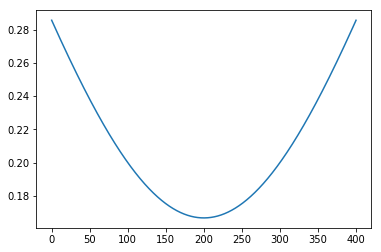

In [11]:
N = 1000
a11 = 400
a22 = 200
x_max = N - a11 - a22
d = np.arange(0, x_max, 0.01)
k = kappa(N, a11, a22, d)

plt.plot(d, k)
plt.show()

# Another interesting question
Suppose raters 1 and 2 are equally accurate, but they are trained on samples with different class proportions, is it possible for rater 2 to maximize Cohen's Kappa?